#AutoEncoders

Autoencoders are a type of neural network that can learn to efficiently encode and decode data. They are often used for unsupervised learning and dimensionality reduction tasks.

The basic idea behind autoencoders is to have an "encoder" network that compresses the input data into a lower-dimensional representation, known as the "latent space" or "bottleneck". This compressed representation captures the most important features of the input data. Then, there is a "decoder" network that takes this compressed representation and reconstructs the original input data.

The goal of an autoencoder is to minimize the reconstruction error, which is the difference between the input data and the reconstructed output. By training the autoencoder on a large dataset, it learns to encode and decode the data in an efficient and effective way.

Autoencoders have several applications. One common use is for dimensionality reduction, where they can compress high-dimensional data into a lower-dimensional representation. This can be useful for visualization, as it allows us to represent complex data in a more manageable form. Autoencoders are also used for data denoising, where they can learn to remove noise from corrupted data. Additionally, they can be used for anomaly detection, where they learn to reconstruct normal data and identify anomalies as data points with high reconstruction error.

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 2)  # Bottleneck of 2D
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Linear(256, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Create an instance of the autoencoder model
autoencoder = Autoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Train the autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        images, _ = data
        images = images.view(images.size(0), -1)

        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader)}")


Epoch 1/10, Loss: 0.05907912769201976
Epoch 2/10, Loss: 0.04999999562179102
Epoch 3/10, Loss: 0.04756355286438836
Epoch 4/10, Loss: 0.04619192273250775
Epoch 5/10, Loss: 0.045272028983147666
Epoch 6/10, Loss: 0.04464425076680905
Epoch 7/10, Loss: 0.044111238335813284
Epoch 8/10, Loss: 0.04367595738661823
Epoch 9/10, Loss: 0.043312519248614685
Epoch 10/10, Loss: 0.04300985851489913


# Bottleneck in Autoencoder and the manifold hypothesis

In the context of autoencoders, the notion of a **"bottleneck"** refers to a layer in the network with a lower dimensionality than the input and output layers. This bottleneck layer acts as a compressed representation of the input data. The idea is that by reducing the dimensionality, the autoencoder can capture the most important features and underlying structure of the data.

The concept of a bottleneck in autoencoders is closely related to the manifold hypothesis. The manifold hypothesis states that high-dimensional data in real-world applications often lie on or near a low-dimensional manifold embedded within the high-dimensional space. In other words, complex data can be effectively represented by a lower-dimensional structure.

By introducing a bottleneck layer in an autoencoder, we force the network to learn a lower-dimensional representation of the input data. This compressed representation can be seen as an approximation of the underlying low-dimensional manifold. The bottleneck layer acts as a bottleneck in information flow, where the network must learn to encode the essential information into a reduced-dimensional representation and then decode it back to reconstruct the original input.

The objective of the autoencoder is to learn an encoding-decoding process that can effectively capture and reconstruct the input data using the bottleneck layer. By doing so, the autoencoder implicitly learns the structure and important features of the data, aligning with the manifold hypothesis.

The bottleneck layer's dimensionality acts as a constraint on the network, forcing it to capture the most salient information while discarding or compressing less relevant or noisy aspects of the data. This compression process can help reveal the underlying structure of the data and facilitate tasks such as dimensionality reduction, denoising, and feature extraction.

1280


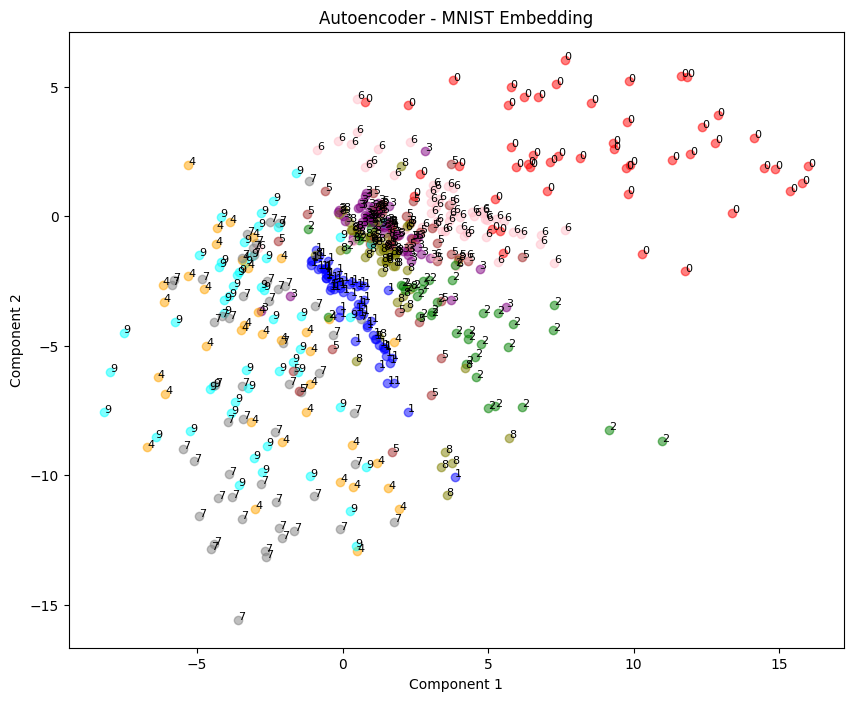

In [17]:
# Visualize the reconstructed images
images = []
labels = []

for i, (image, label) in enumerate(trainloader):
    if i >= 10:
        break
    images.append(image)
    labels.append(label)

images = torch.cat(images, dim=0)
labels = torch.cat(labels, dim=0)



images = images.view(images.size(0), -1)

with torch.no_grad():
    encoded_images = autoencoder.encoder(images)
    reconstructed_images = autoencoder.decoder(encoded_images).detach().numpy()

# Convert tensors to numpy arrays for visualization
encoded_images = encoded_images.numpy()
labels = labels.numpy()

# Create a dictionary to map class labels to colors
label_colors = {
    0: 'red',
    1: 'blue',
    2: 'green',
    3: 'purple',
    4: 'orange',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'olive',
    9: 'cyan',
}


# Plot the 2D scatter plot with annotations and color coding
plt.figure(figsize=(10, 8))
for i in range(500):
    x, y = encoded_images[i]
    label = labels[i]
    color = label_colors[label]

    plt.scatter(x, y, color=color, alpha=0.5)
    plt.annotate(str(label), (x, y), color='black', fontsize=8)

plt.title("Autoencoder - MNIST Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.show()


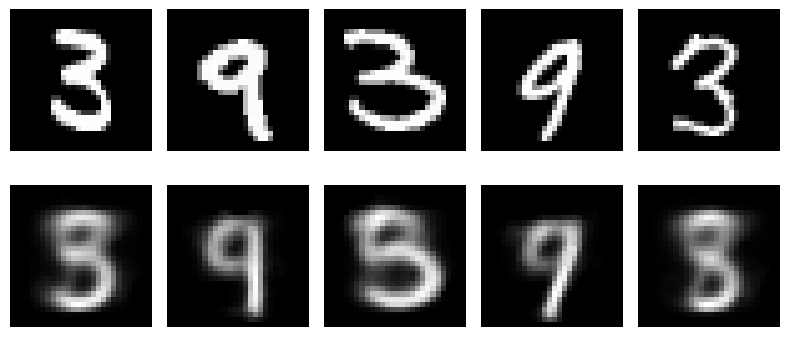

In [18]:
# Show an example of the reconstructed image
plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(2, 5, i+6)
    plt.imshow(reconstructed_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Conv autoencoder

The below code implements a convolutional autoencoder (CAE), which is a type of neural network that learns to encode and decode images. Unlike a traditional autoencoder that uses fully connected layers, the CAE uses convolutional layers for feature extraction and reconstruction. This allows the CAE to capture spatial information and leverage the hierarchical nature of images.

The CAE consists of an encoder network that compresses the input images into a lower-dimensional representation (in this case, a 2D projection in the bottleneck), and a decoder network that reconstructs the images from the compressed representation. By training the CAE on a large dataset of images, it learns to encode the essential features of the images and reconstruct them accurately.

One of the main advantages of the CAE is its ability to learn hierarchical and spatially invariant representations. The convolutional layers enable the CAE to capture local patterns and spatial relationships, making it particularly effective for tasks such as image denoising, inpainting, and compression. Additionally, the 2D projection in the bottleneck of the CAE allows for a reduced-dimensional representation of the images, which can be useful for tasks like visualization and dimensionality reduction.

The CAE has been widely used in computer vision applications, including image generation, image enhancement, and anomaly detection. It can learn to extract meaningful features from images, enabling it to generate new images that resemble the training data or identify anomalies based on reconstruction errors. The hierarchical nature of the CAE also facilitates the discovery of hierarchical representations in complex datasets, providing valuable insights into the underlying structure of the data.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the convolutional autoencoder architecture
class ConvAutoencoder(nn.Module):
    def __init__(self):
        super(ConvAutoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 8, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(8 * 7 * 7, 2)  # 2D projection in the bottleneck
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(2, 8 * 7 * 7),
            nn.Unflatten(1, (8, 7, 7)),
            nn.ReLU(),
            nn.ConvTranspose2d(8, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Load the MNIST dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

# Create an instance of the convolutional autoencoder model
cae = ConvAutoencoder()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(cae.parameters(), lr=0.001)

# Train the convolutional autoencoder
num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for data in trainloader:
        images, _ = data

        optimizer.zero_grad()
        outputs = cae(images)

        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(trainloader)}")

# Encode the MNIST dataset into 2D latent space
encoded_images = []
labels = []

with torch.no_grad():
    for images, labels_batch in trainloader:
        encoded_batch = cae.encoder(images).numpy()
        encoded_images.extend(encoded_batch)
        labels.extend(labels_batch.numpy())

encoded_images = np.array(encoded_images)
labels = np.array(labels)

# Plot the 2D scatter plot with image annotations
plt.figure(figsize=(10, 8))
for i in range(500):
    x, y = encoded_images[i]
    label = labels[i]

    plt.scatter(x, y, color='blue', alpha=0.6)
    plt.annotate(str(label), (x, y), color='black', fontsize=8)

plt.title("Convolutional Autoencoder - MNIST Embedding")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

plt.show()
